In [ ]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE 
from sklearn.decomposition import PCA

# Set the style for seaborn plots
sns.set(style="whitegrid", palette="bright")  













In [6]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Hp\Desktop\data")

# Display the first 5 rows
df.head()

# Drop the customer ID column as it's not needed
df.drop(columns=['customerID'], inplace=True)


# Remove missing values
df.dropna(inplace=True) 

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values in 'TotalCharges' with median
df.fillna({'TotalCharges': df['TotalCharges'].median()}, inplace=True)

# Display dataset info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [7]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the dataset after encoding
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [8]:
# Display dataset shape
print("Dataset Shape:", df.shape)

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Display data types of each column
print("\nData Types of Each Column:")
print(df.dtypes)

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (7021, 20)

Missing Values in Each Column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Types of Each Column:
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod

C:\Users\Hp\AppData\Local\Temp\ipykernel_1108\661803653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


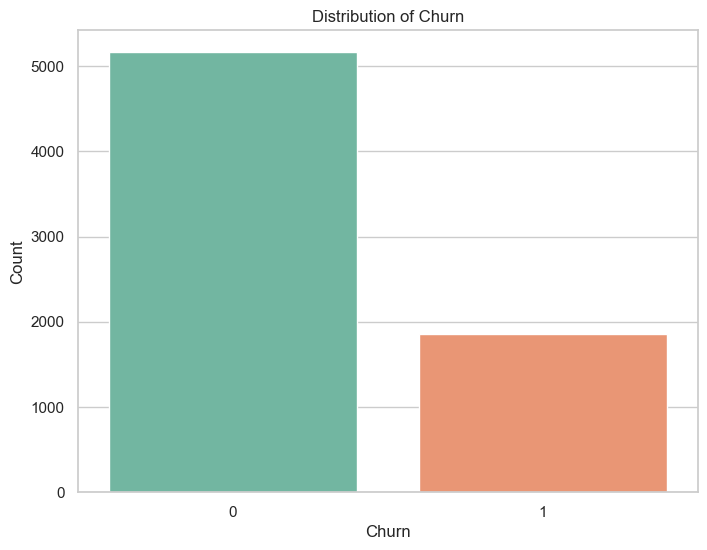

In [9]:
# We Visualize the distribution of the target variable (Churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

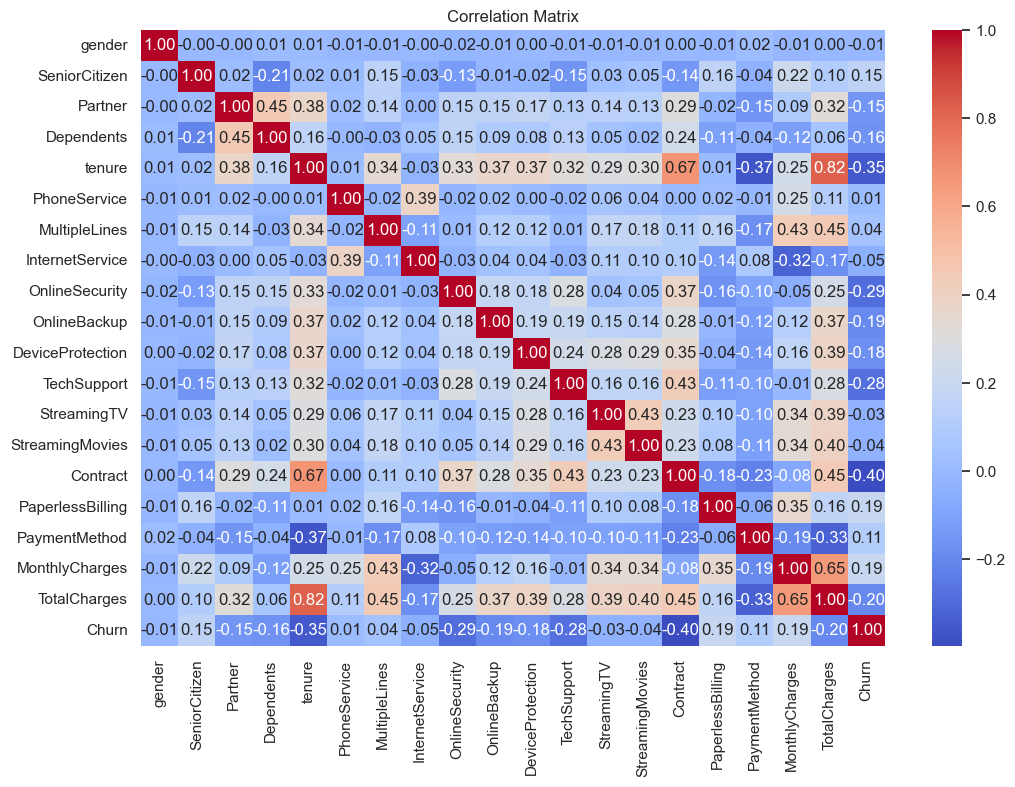

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

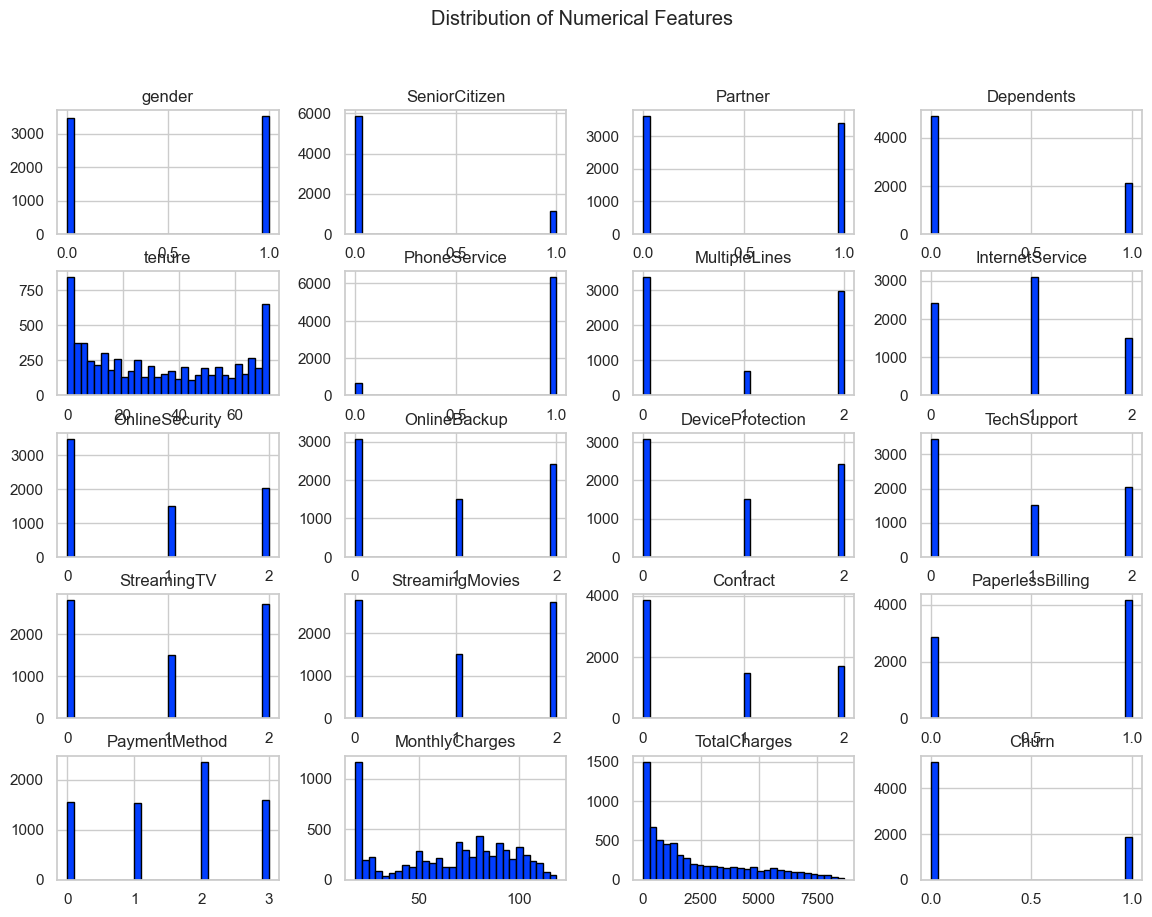

In [11]:
# Visualize the distribution of numerical features
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_1108\718501397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
C:\Users\Hp\AppData\Local\Temp\ipykernel_1108\718501397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
C:\Users\Hp\AppData\Local\Temp\ipykernel_1108\718501397.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')


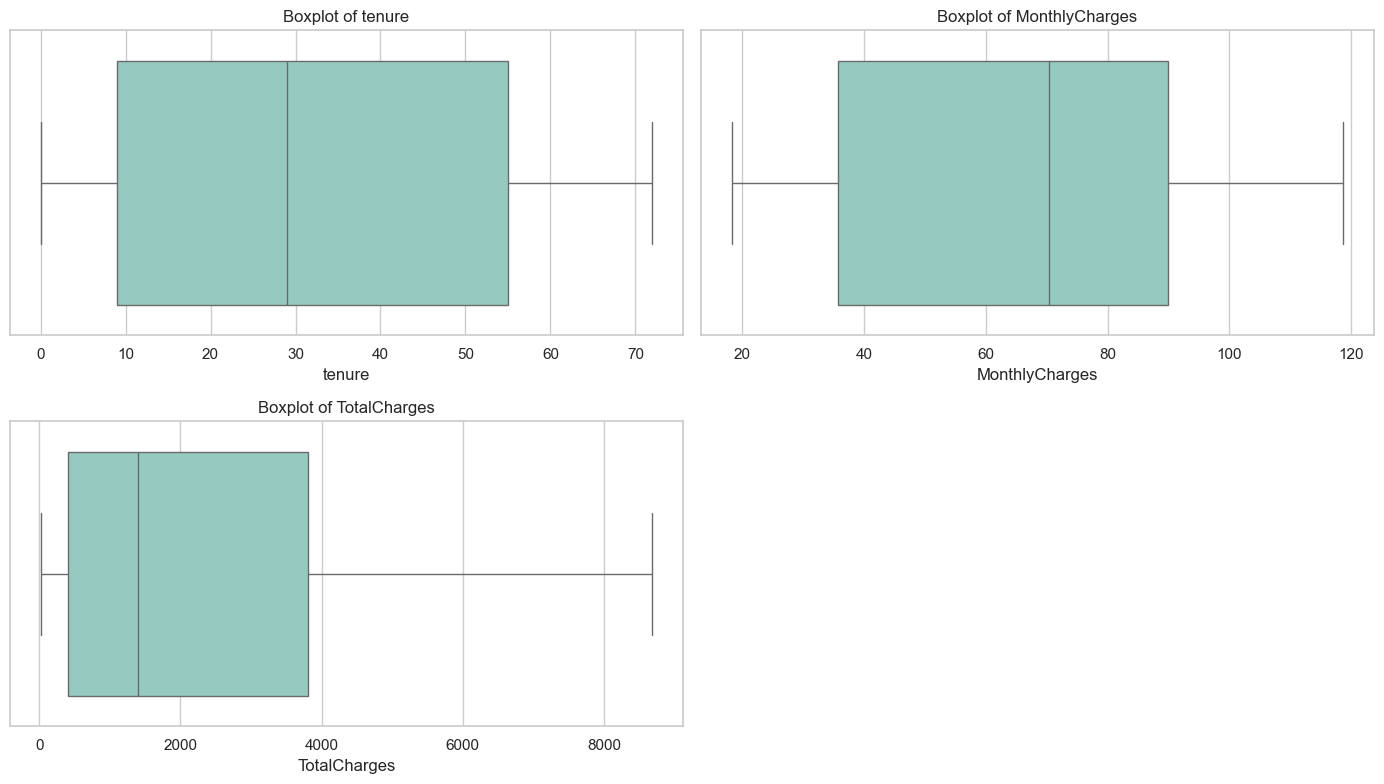

In [13]:
# Define numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create boxplots for numerical features
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], palette='Set3')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

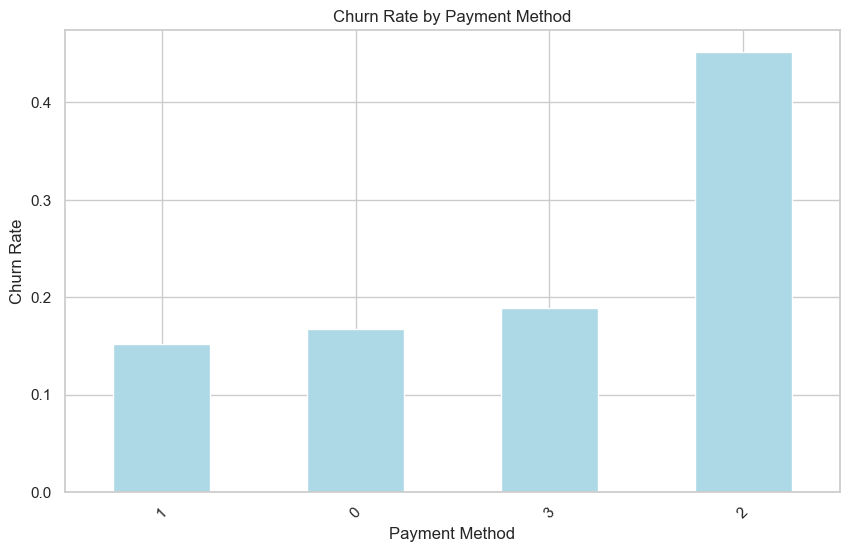

In [14]:
# Churn rate by Payment Method
plt.figure(figsize=(10, 6))
df.groupby('PaymentMethod')['Churn'].mean().sort_values().plot(kind='bar', color='lightblue')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

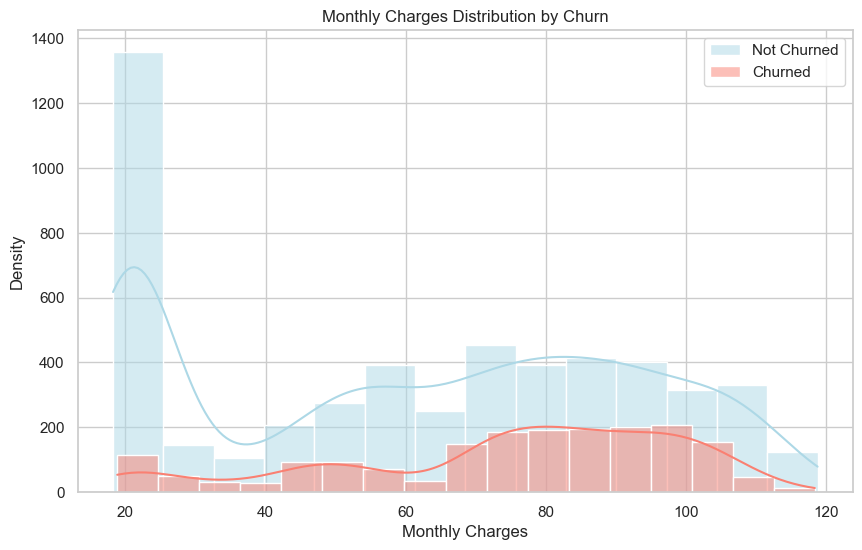

In [15]:
# Distribution of MonthlyCharges vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Churn'] == 0]['MonthlyCharges'], color='lightblue', label='Not Churned', kde=True)
sns.histplot(df[df['Churn'] == 1]['MonthlyCharges'], color='salmon', label='Churned', kde=True)
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Select categorical and numerical columns
categorical_columns = ['gender', 'Contract', 'PaymentMethod']
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply One-Hot Encoding to categorical columns and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Applying  transformations
X_processed = preprocessor.fit_transform(df.drop(columns=['Churn']))

# We  Convert target variable 'Churn' to binary
y = df['Churn']

#  We Display processed feature shape
X_processed.shape

(7021, 12)

In [ ]:
# Apply SMOTE to balanced the dataset
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# Display class distribution after SMOTE
print("Class Distribution After SMOTE:\n", pd.Series(y_resampled).value_counts())

c:\Users\HP\miniconda3\envs\tf_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class Distribution After SMOTE:
 Churn
0    5164
1    5164
Name: count, dtype: int64


In [ ]:
# Spliting  the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing sets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (8262, 12)
Testing Data Shape: (2066, 12)


In [ ]:
# Applying PCA on training data to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)  # Apply the same PCA transformation to test set

# Displaying new shape after PCA
print("Training Data Shape After PCA:", X_train_pca.shape)
print("Testing Data Shape After PCA:", X_test_pca.shape)

# Print final dataset shapes
print("Final Training Set Shape:", X_train_pca.shape)
print("Final Testing Set Shape:", X_test_pca.shape)

# Checking the first few rows of the preprocessed dataset
pd.DataFrame(X_train_pca).head()

Training Data Shape After PCA: (8262, 7)
Testing Data Shape After PCA: (2066, 7)
Final Training Set Shape: (8262, 7)
Final Testing Set Shape: (2066, 7)


,0,1,2,3,4,5,6
0,1.466129,0.989827,-0.740866,0.452681,0.086182,-0.110722,0.296887
1,1.199047,0.511414,-0.742190,0.649497,0.128562,-0.134062,0.253529
2,-0.901647,0.659529,0.731839,-0.656288,-0.365734,-0.669542,-0.557734
3,2.212921,0.097856,-0.724191,0.569861,-0.585488,0.769263,0.035968
4,1.322530,0.957590,0.690861,0.207355,-0.719029,0.894026,-0.104285
